# Electric Vehicle Population

### Import the Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Data

In [6]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150482 non-null  object 
 1   County                                             150479 non-null  object 
 2   City                                               150479 non-null  object 
 3   State                                              150482 non-null  object 
 4   Postal Code                                        150479 non-null  float64
 5   Model Year                                         150482 non-null  int64  
 6   Make                                               150482 non-null  object 
 7   Model                                              150482 non-null  object 
 8   Electric Vehicle Type                              150482 non-null  object

In [8]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


### Data Cleaning

##### Check for missing values in the dataset

In [11]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 341
DOL Vehicle ID                                         0
Vehicle Location                                       7
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

##### Fill missing values in 'County' using the mode (most frequent value)

In [13]:
df['County'] = df['County'].fillna(df['County'].mode()[0])

In [14]:
df = df.dropna(subset=['Postal Code'])

### EDA

In [16]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,150479.000000,150479.000000,150479.000000,150479.000000,150141.000000,1.504790e+05,1.504790e+05
mean,98168.344154,2020.005569,67.875770,1312.013337,29.343950,2.111116e+08,5.297195e+10
std,2473.612184,3.015025,96.229368,9227.969013,14.824829,8.196129e+07,1.638841e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.693501e+08,5.303301e+10
50%,98122.000000,2021.000000,18.000000,0.000000,33.000000,2.150308e+08,5.303303e+10
75%,98370.000000,2023.000000,97.000000,0.000000,43.000000,2.399117e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


##### Count of Vehicles by "Make"

In [18]:
df['Make'].value_counts()

Make
TESLA                   68981
NISSAN                  13496
CHEVROLET               12026
FORD                     7614
BMW                      6439
KIA                      6198
TOYOTA                   5223
VOLKSWAGEN               4074
VOLVO                    3536
JEEP                     3292
HYUNDAI                  3171
AUDI                     3006
CHRYSLER                 2642
RIVIAN                   2483
MERCEDES-BENZ            1054
PORSCHE                  1028
MITSUBISHI                849
HONDA                     810
FIAT                      806
MINI                      791
POLESTAR                  764
SUBARU                    623
SMART                     274
LINCOLN                   229
JAGUAR                    228
LUCID                     190
CADILLAC                  176
LEXUS                     138
MAZDA                     136
GENESIS                   107
LAND ROVER                 47
FISKER                     17
ALFA ROMEO                 12
AZURE

##### Vehicle Distribution by Year

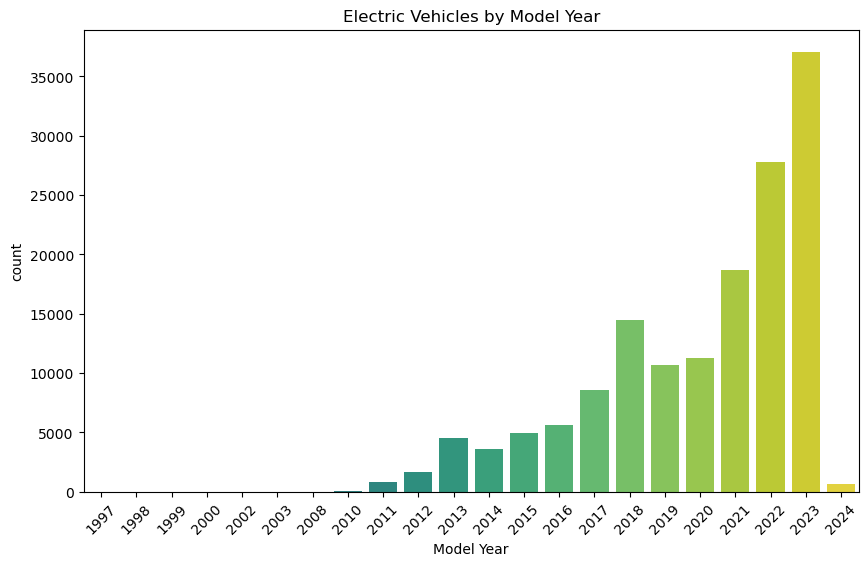

In [20]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'Model Year', data = df, palette = 'viridis', hue='Model Year', legend=False)
plt.title('Electric Vehicles by Model Year')
plt.xticks(rotation=45)
plt.show()

##### Electric Range Analysis

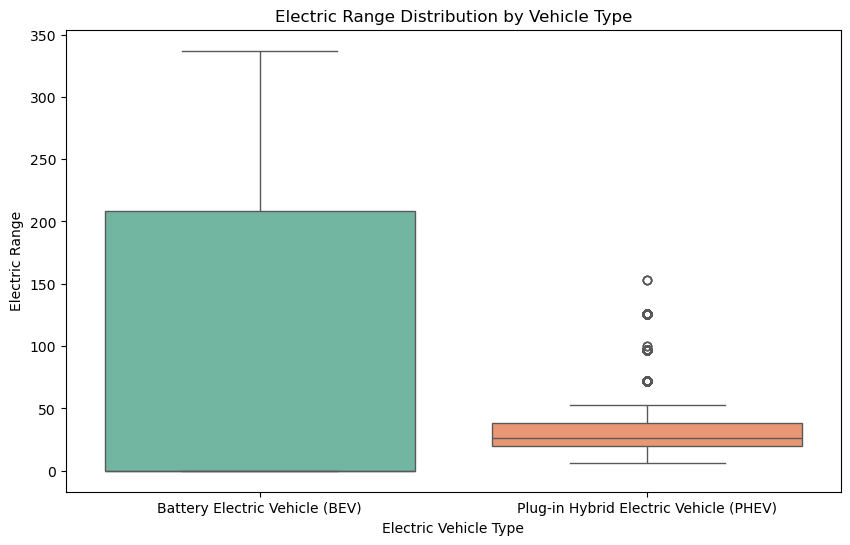

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=df, palette='Set2', hue = 'Electric Vehicle Type', legend = False )
plt.title('Electric Range Distribution by Vehicle Type')
plt.show()

##### Vehicle Distribution by County

In [24]:
county_counts = df['County'].value_counts()

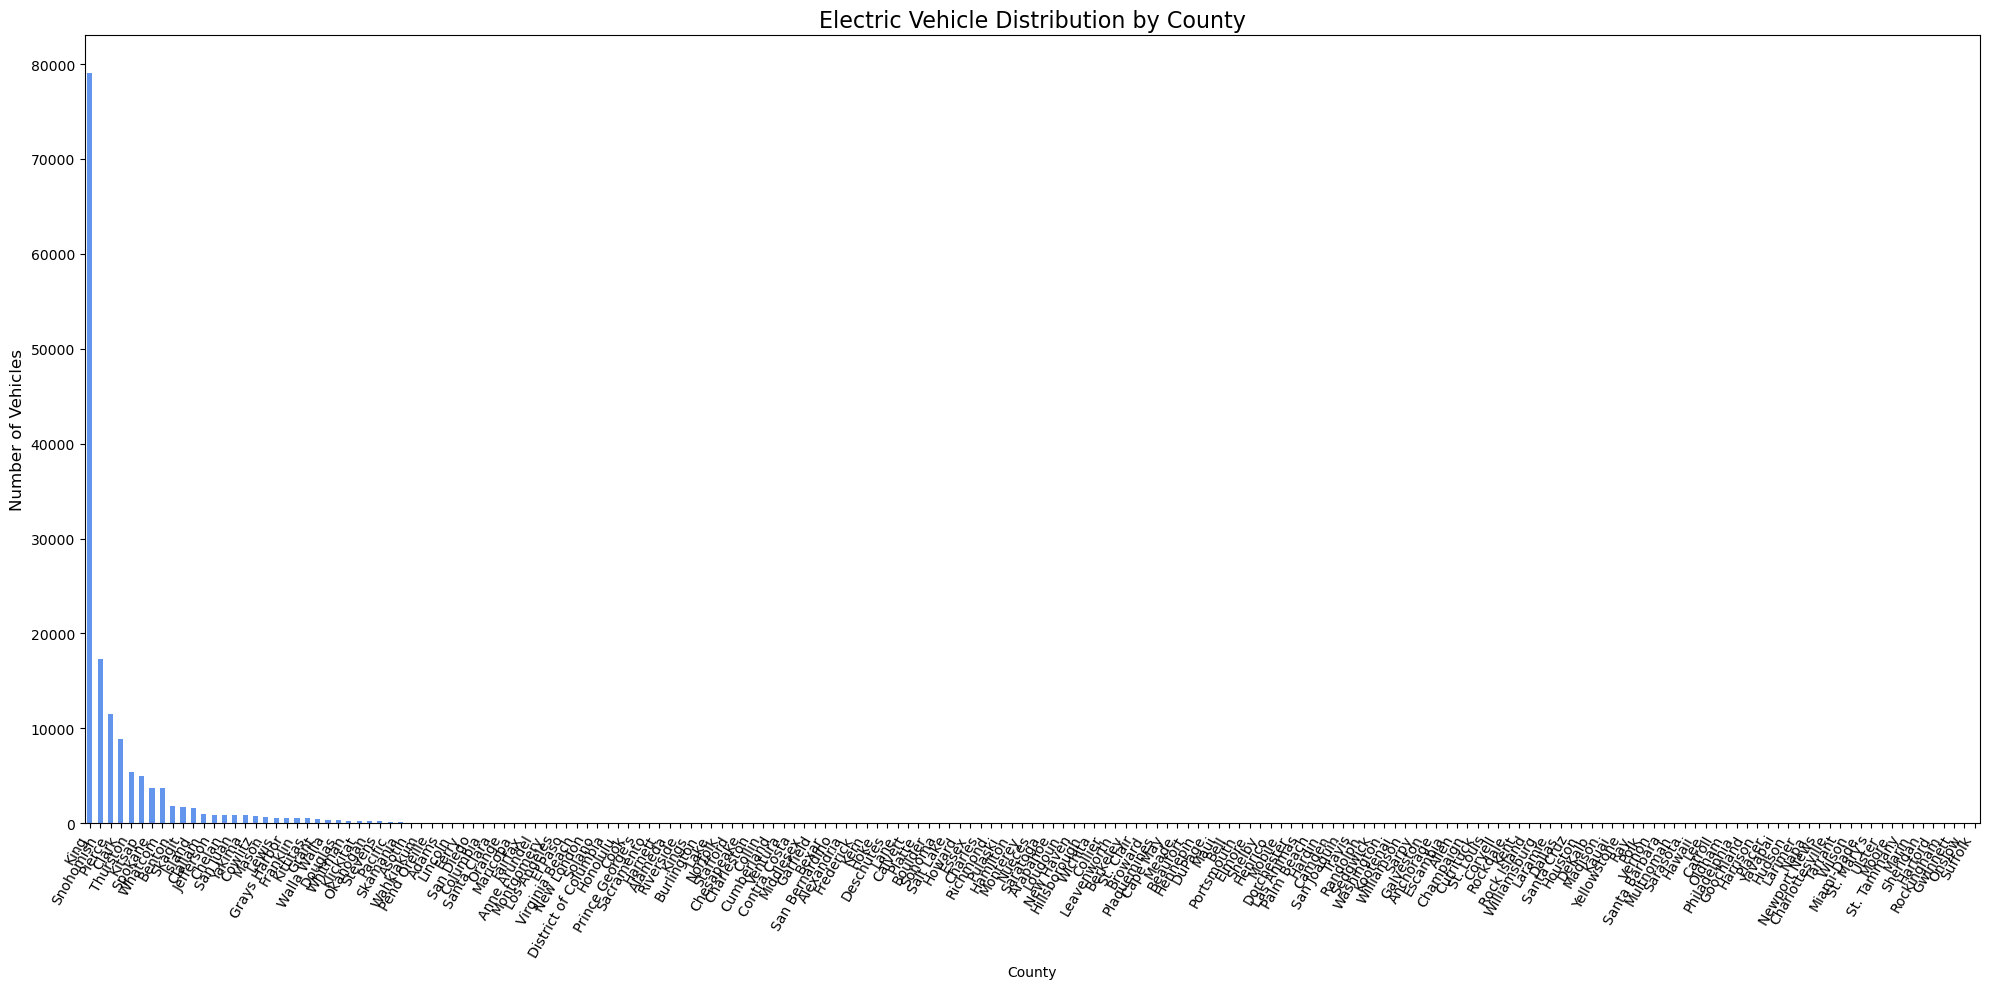

In [25]:
plt.figure(figsize=(20, 10))  
county_counts.plot(kind='bar', color='cornflowerblue')
plt.title('Electric Vehicle Distribution by County', fontsize=16)
plt.ylabel('Number of Vehicles', fontsize=12)
plt.xticks(rotation=60, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

##### Vehicle Distribution by City

In [27]:
city_counts = df['City'].value_counts().head(10)

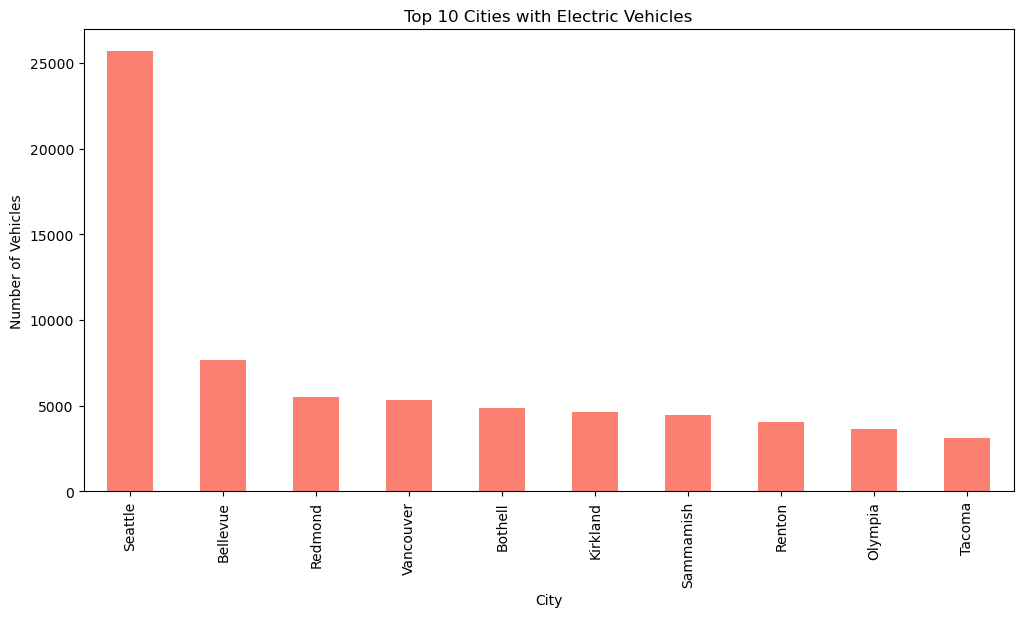

In [28]:
plt.figure(figsize=(12, 6))
city_counts.plot(kind='bar', color='salmon')
plt.title('Top 10 Cities with Electric Vehicles')
plt.ylabel('Number of Vehicles')
plt.show()

##### Electric Utility Analysis

In [30]:
utility_counts = df['Electric Utility'].value_counts().head(10)

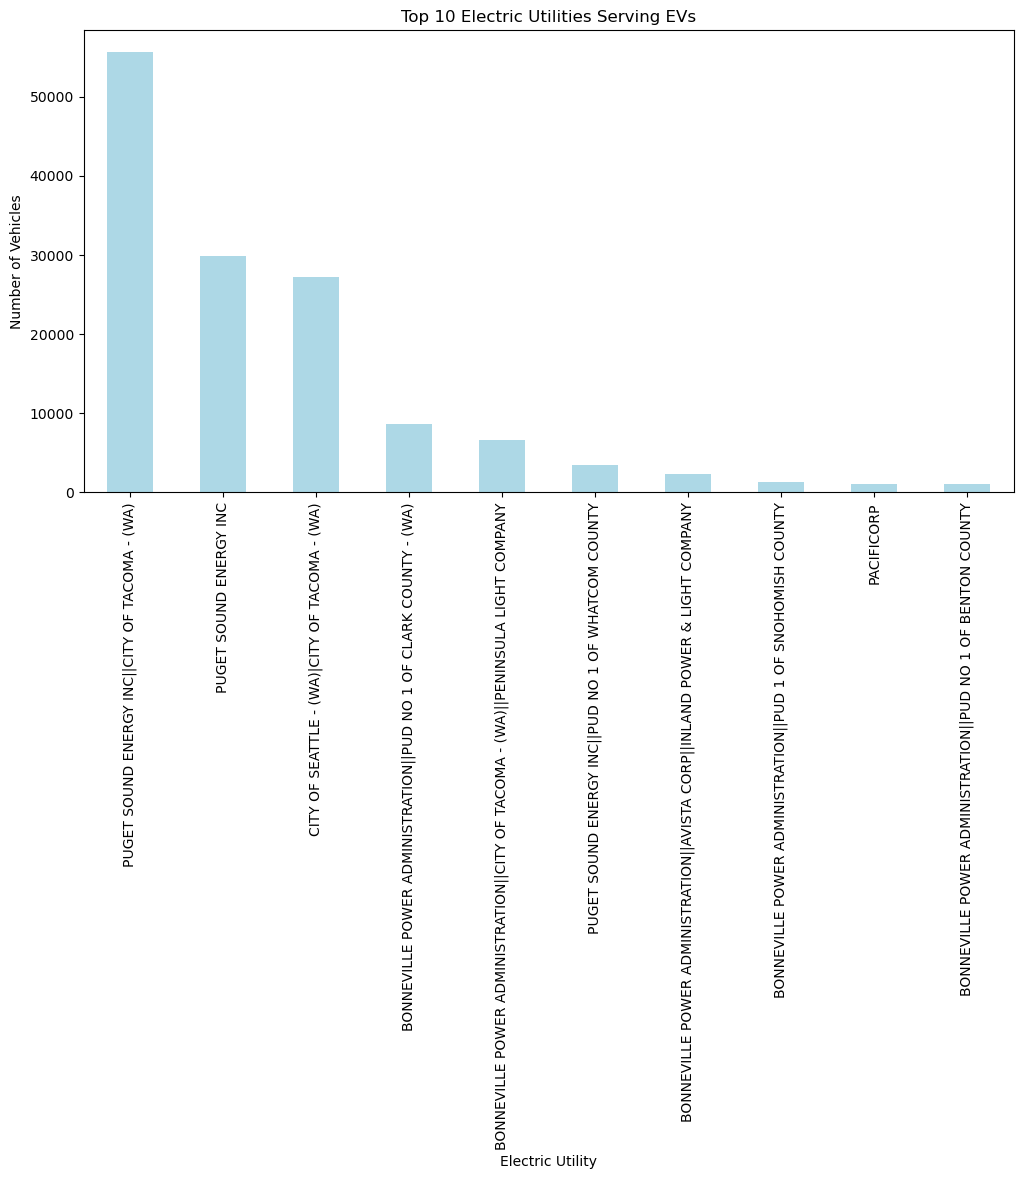

In [31]:
plt.figure(figsize=(12, 6))
utility_counts.plot(kind='bar', color='lightblue')
plt.title('Top 10 Electric Utilities Serving EVs')
plt.ylabel('Number of Vehicles')
plt.show()

### Correlation Analysis

##### Correlation Matrix

In [34]:
corr_matrix = df[['Model Year', 'Electric Range', 'Base MSRP', 'Legislative District']].corr()

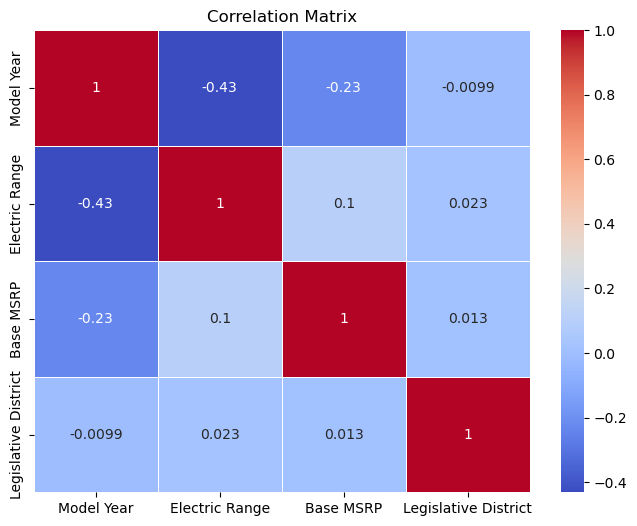

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

##### Electric Range by Model Year

In [37]:
yearly_range = df.groupby('Model Year')['Electric Range'].mean()

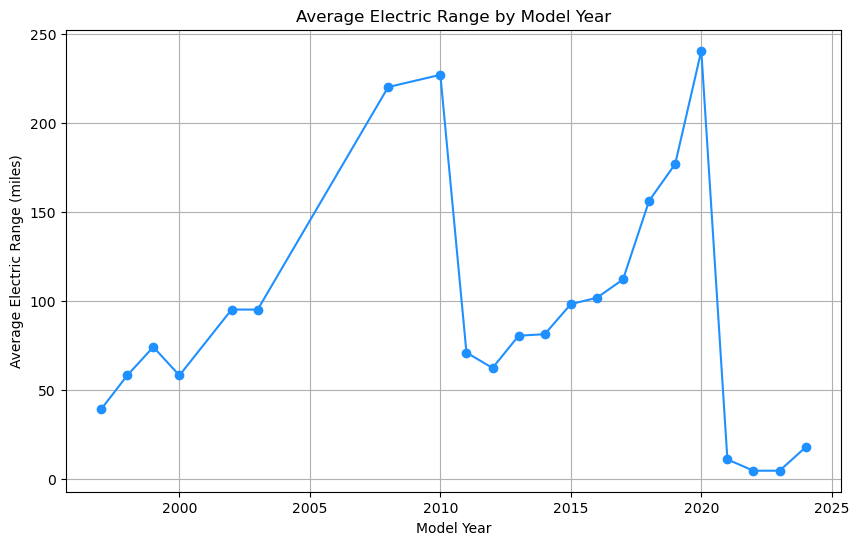

In [38]:
plt.figure(figsize=(10, 6))
yearly_range.plot(kind='line', marker='o', color='dodgerblue')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

##### Top Vehicle Makes by Electric Range

In [40]:
make_range = df.groupby('Make')['Electric Range'].mean().sort_values(ascending=False).head(10)

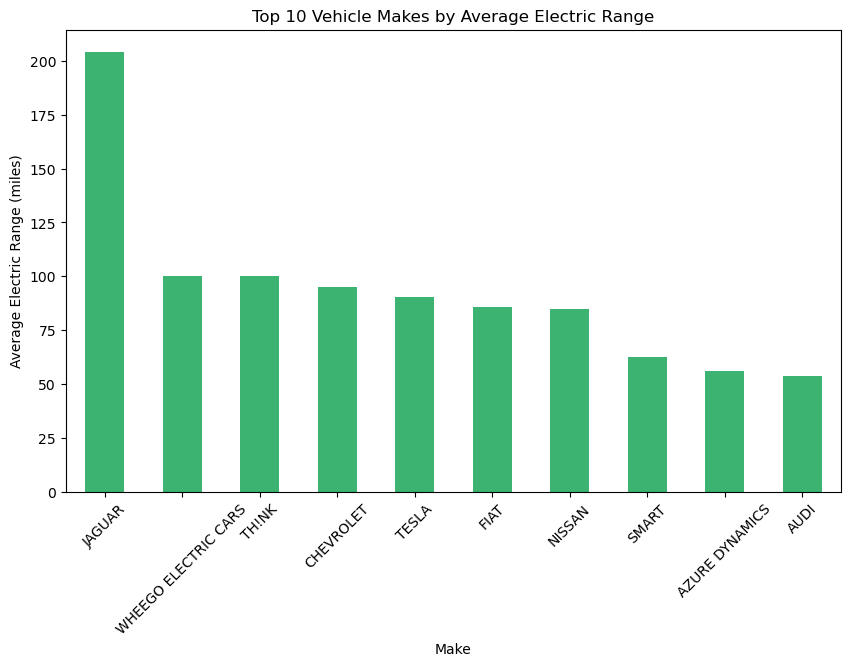

In [41]:
plt.figure(figsize=(10, 6))
make_range.plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 Vehicle Makes by Average Electric Range')
plt.ylabel('Average Electric Range (miles)')
plt.xticks(rotation=45)
plt.show()

##### Electric Range by City

In [43]:
city_range = df.groupby('City')['Electric Range'].mean().sort_values(ascending=False).head(10)

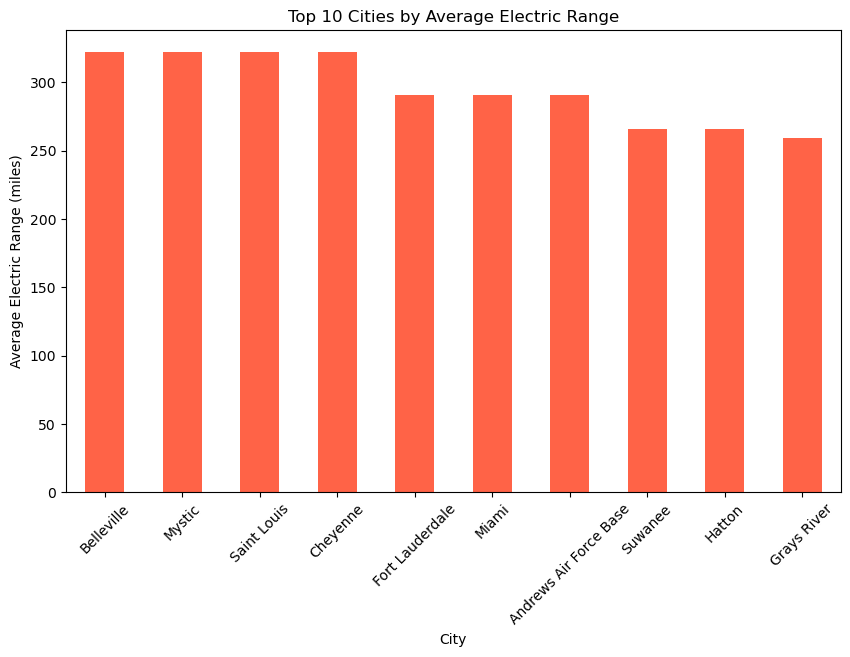

In [44]:
plt.figure(figsize=(10, 6))
city_range.plot(kind='bar', color='tomato')
plt.title('Top 10 Cities by Average Electric Range')
plt.ylabel('Average Electric Range (miles)')
plt.xticks(rotation=45)
plt.show()

### Train-Test Split and Regression

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [47]:
features = ['Model Year', 'Base MSRP', 'Legislative District']
X = df[features]
y = df['Electric Range']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
X_test = X_test.dropna()

In [52]:
y_pred = model.predict(X_test)

In [53]:
X_test_clean = X_test.dropna()
y_test_clean = y_test[X_test_clean.index]  

In [54]:
print(f"Length of X_test: {len(X_test)}")
print(f"Length of y_test: {len(y_test)}")

Length of X_test: 30029
Length of y_test: 30096


In [55]:
y_pred = model.predict(X_test_clean)
mse = mean_squared_error(y_test_clean, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 7521.159064051964


### Clustering Analysis

##### K-Means Clustering on Electric Range and Model Year

In [58]:
from sklearn.cluster import KMeans

In [59]:
X_clustering = df[['Model Year', 'Electric Range']]

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

In [62]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [63]:
df['Cluster'] = kmeans.labels_

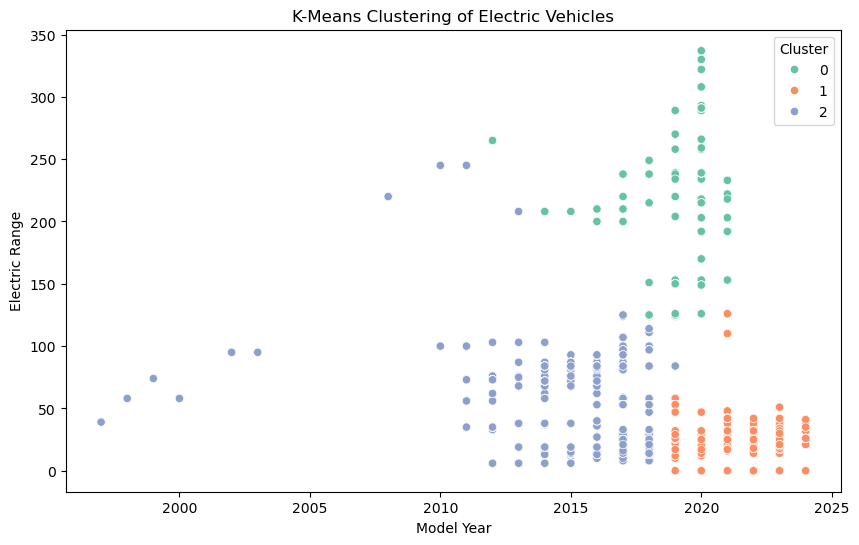

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Model Year', y='Electric Range', hue='Cluster', palette='Set2', data=df)
plt.title('K-Means Clustering of Electric Vehicles')
plt.show()

### Time Series Analysis of Electric Vehicle Registration

##### Monthly Trend of Vehicle Registrations

In [67]:
df['Registration Date'] = pd.to_datetime(df['Model Year'], format='%Y')
monthly_registrations = df.groupby(df['Registration Date'].dt.to_period('M')).size()

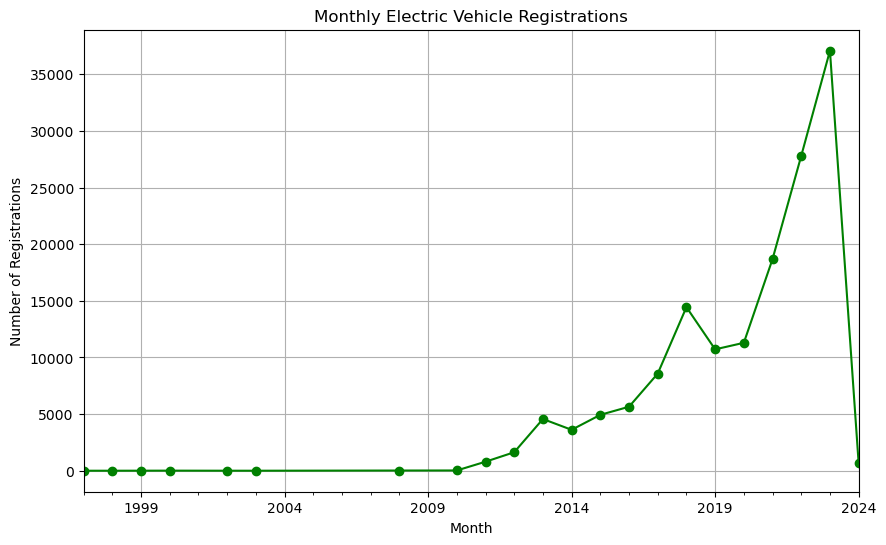

In [68]:
plt.figure(figsize=(10, 6))
monthly_registrations.plot(kind='line', marker='o', color='green')
plt.title('Monthly Electric Vehicle Registrations')
plt.xlabel('Month')
plt.ylabel('Number of Registrations')
plt.grid(True)
plt.show()

##### Pair Plot for Feature Exploration

In [70]:
selected_features = df[['Model Year', 'Electric Range', 'Legislative District', 'Base MSRP']]

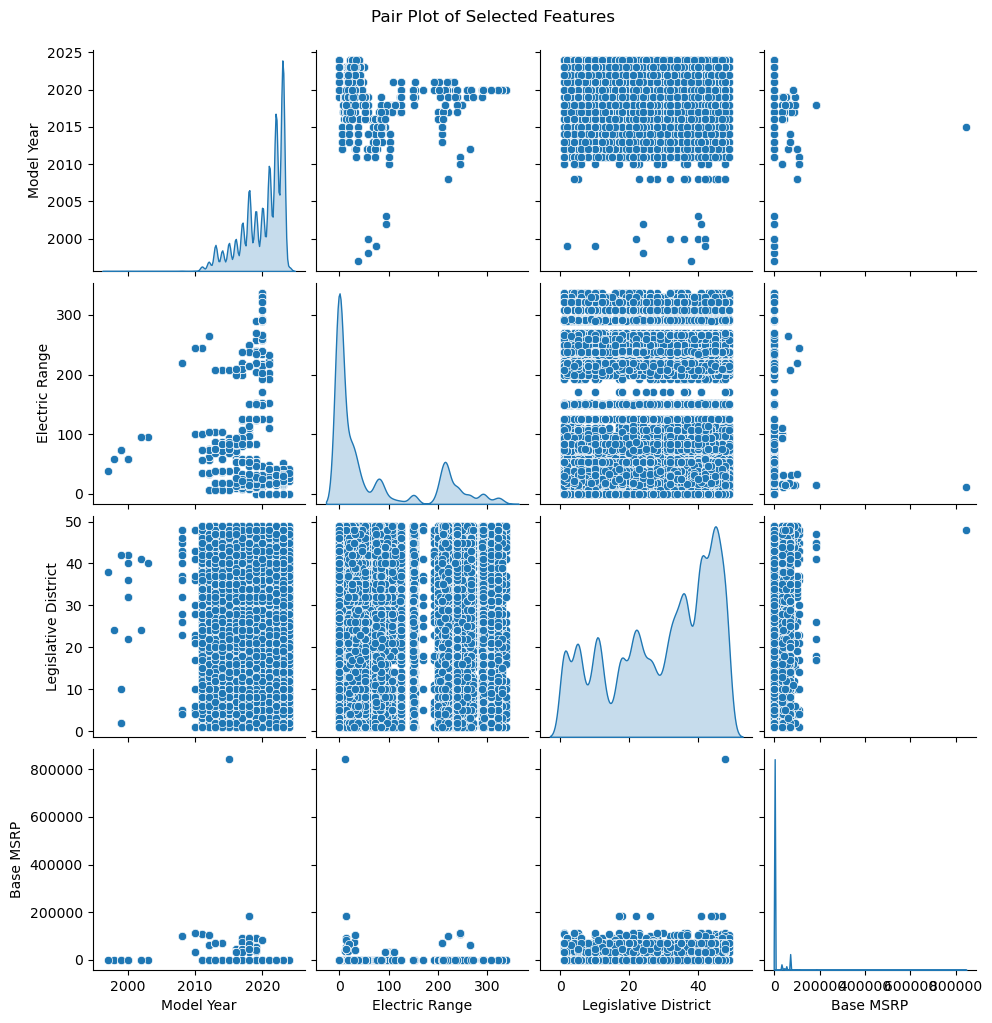

In [71]:
sns.pairplot(selected_features, diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

### Feature Engineering for Predictive Modeling

##### Feature engineering: Adding model age

In [74]:
current_year = 2024
df['Model Age'] = current_year - df['Model Year']

##### One-hot encoding for Electric Utility

In [76]:
df_encoded = pd.get_dummies(df, columns=['Electric Utility'], drop_first=True)

##### Select the new set of features

In [78]:
features = ['Model Year', 'Model Age', 'Legislative District'] + [col for col in df_encoded.columns if 'Electric Utility_' in col]

In [79]:
X = df_encoded[features]
y = df_encoded['Electric Range']

In [80]:
print(X.shape, y.shape)

(150479, 78) (150479,)


In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [84]:
y_pred_rf = rf_model.predict(X_test)

In [85]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest Mean Squared Error: {mse_rf}')

Random Forest Mean Squared Error: 3084.807925240182


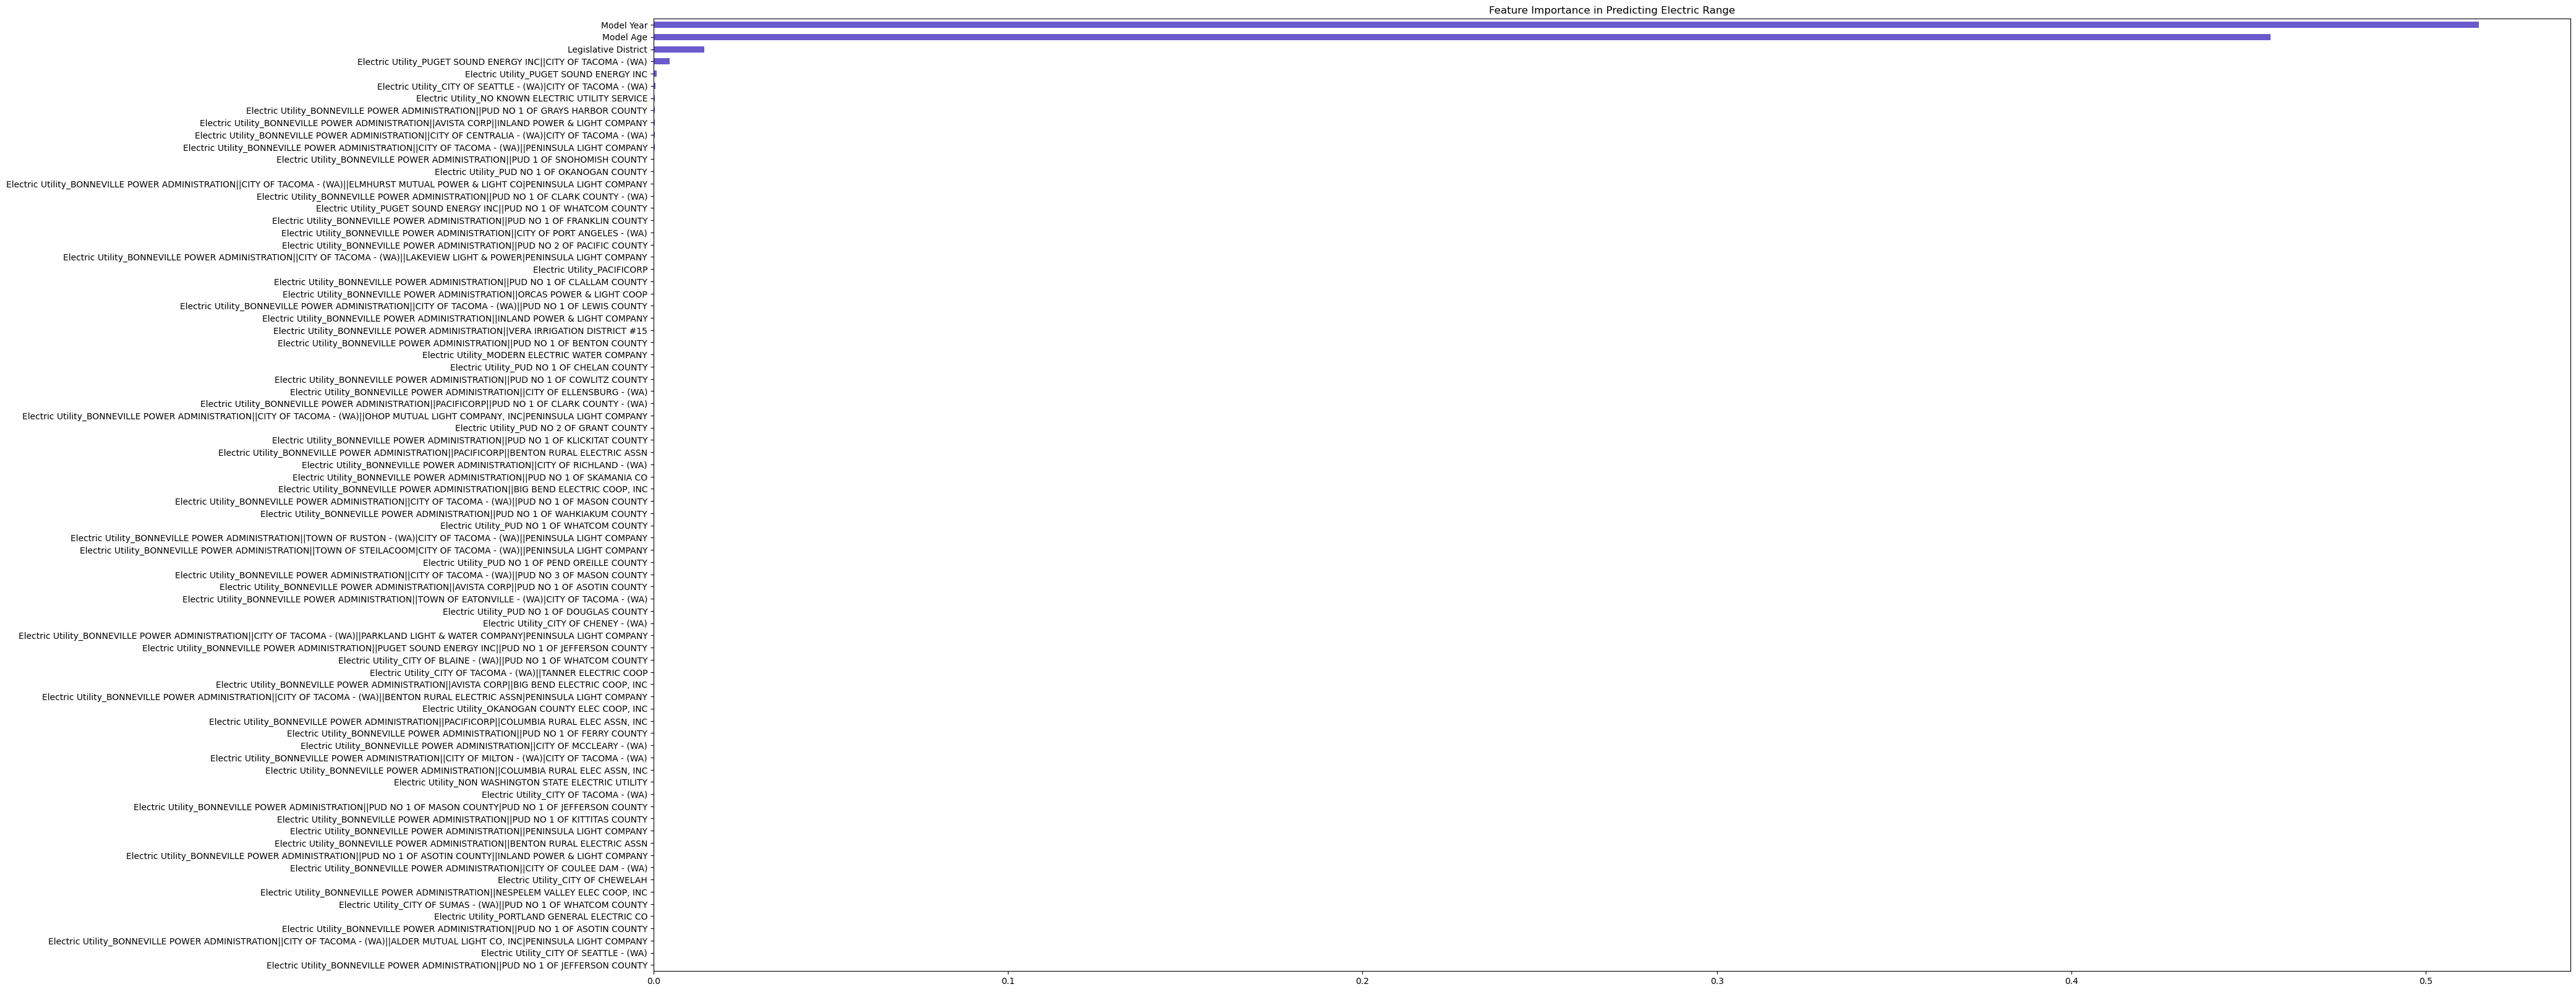

In [86]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(40, 20), color='slateblue')
plt.title('Feature Importance in Predicting Electric Range')
plt.show()

### Neural Networks for Prediction

In [88]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [89]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [90]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [91]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
3762/3762 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 14169.8438 - val_loss: 13413.2822
Epoch 2/100
3762/3762 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 13278.0703 - val_loss: 12965.9160
Epoch 3/100
3762/3762 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 12871.2402 - val_loss: 12545.5859
Epoch 4/100
3762/3762 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 12505.4385 - val_loss: 12152.3027
Epoch 5/100
3762/3762 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 12118.3662 - val_loss: 11786.8936
Epoch 6/100
3762/3762 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 11587.2832 - val_loss: 11447.0400
Epoch 7/100
3762/3762 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 11503.0703 - val_loss: 11136.8975
Epoch 8/100
3762/3762 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 11087.1416 - val_loss: 10853.0615
Epoch 9/100
3762/3762 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 10694.5996 - val_loss: 10595.8047
Epoch 10/100
3762/3762 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 10580.9385 - val_loss: 10365.8818
Epoch 11/100
3762/3762 ━

In [92]:
loss = model.evaluate(X_test, y_test)
print(f'Test loss (MSE): {loss}')

941/941 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9211.2676
Test loss (MSE): 9264.9013671875


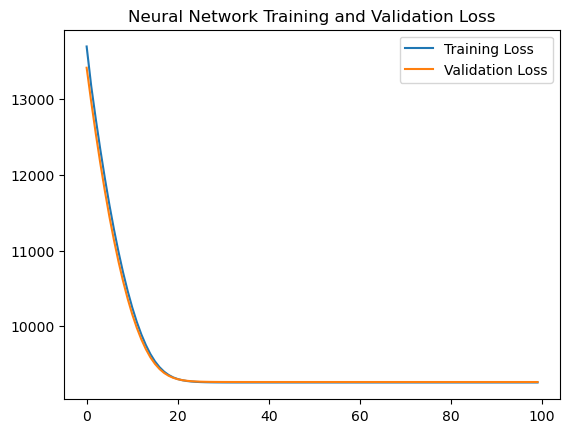

In [93]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Neural Network Training and Validation Loss')
plt.show()

### Principal Component Analysis (PCA) for Dimensionality Reduction

##### PCA 

In [169]:
from sklearn.decomposition import PCA

In [171]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

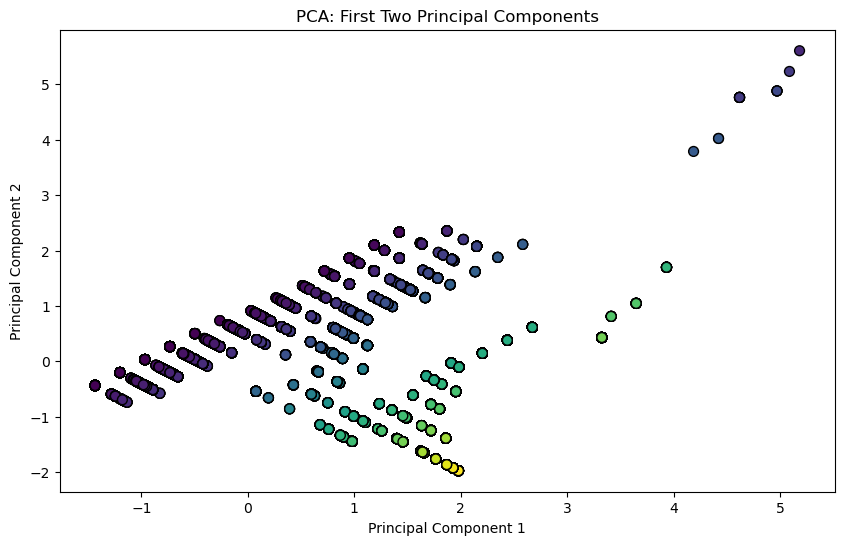

In [173]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [174]:
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')

Explained variance ratio: [0.71566758 0.28433242]


### Time Series Forecasting (for future time features)

##### ARIMA for Time Series Forecasting:

In [200]:
from statsmodels.tsa.arima.model import ARIMA

In [201]:
df['Registration Date'] = pd.to_datetime(df['Registration Date'])
monthly_registrations = df.set_index('Registration Date').resample('M').size()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3932\1721085489.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_registrations = df.set_index('Registration Date').resample('M').size()


In [204]:
arima_model = ARIMA(monthly_registrations, order=(1, 1, 1))
arima_result = arima_model.fit()

##### 12-month forecast

In [209]:
forecast_result = arima_result.get_forecast(steps=12)

In [211]:
forecast = forecast_result.predicted_mean

In [213]:
stderr = forecast_result.se_mean

In [215]:
conf_int = forecast_result.conf_int()

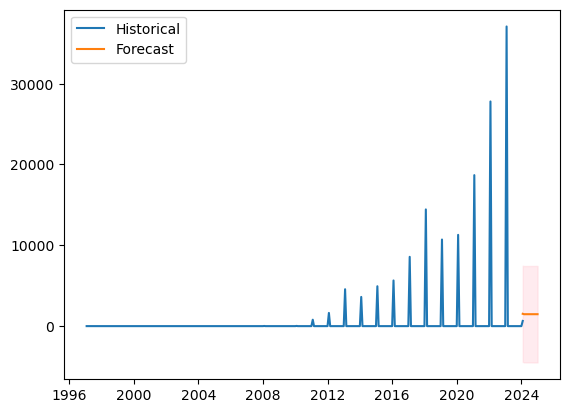

In [219]:
plt.plot(monthly_registrations, label='Historical')
plt.plot(pd.date_range(start=monthly_registrations.index[-1], periods=12, freq='ME'), forecast, label='Forecast')
plt.fill_between(pd.date_range(start=monthly_registrations.index[-1], periods=12, freq='ME'), 
                 conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()

### Feature Extraction Using Text Data

In [227]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [235]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
X_text = vectorizer.fit_transform(df['Electric Vehicle Type'])

In [236]:
from scipy.sparse import hstack
X_combined = hstack([X_text, X_scaled])

In [243]:
rf_model.fit(X_combined, y)

RandomForestRegressor(random_state=42)